In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df =pd.read_csv("C:\\Users\\ADMIN\\Desktop\\New folder\\walmart.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55-100,16,C,4,Unmarried,8,7969
...,...,...,...,...,...,...,...,...,...,...
99994,1003502,P00220342,F,18-25,7,C,4,Married,5,7121
99995,1003503,P00070042,M,18-25,4,B,0,Unmarried,1,11684
99996,1003503,P00296342,M,18-25,4,B,0,Unmarried,8,7824
99997,1003503,P00227842,M,18-25,4,B,0,Unmarried,2,13235


In [30]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [31]:
# Our data is already clean so we dont want to clean it.

# so now we want to analyze our data and their relations

# First of all we will  check which  spends more Male or Female?

In [32]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8753.990479
M    9474.615621
Name: Purchase, dtype: float64

# Now we want to find the average purchase by the User_ID according to their Gender,city_category and Number of purchase catrgory. 

In [26]:
grouped =df.groupby(["User_ID","Gender","City_Category","Marital_Status"])[['Product_Category','Purchase']].mean()
print(grouped)

                                             Product_Category      Purchase
User_ID Gender City_Category Marital_Status                                
1000001 F      A             Unmarried               4.750000   8383.500000
1000002 M      C             Unmarried               6.000000   9159.000000
1000003 M      A             Unmarried               2.000000  12486.750000
1000004 M      B             Married                 1.000000  16651.750000
1000005 M      A             Married                 5.875000   7726.000000
...                                                       ...           ...
1006035 F      C             Unmarried               4.583333   7151.750000
1006036 F      B             Married                 6.208955   7320.134328
1006037 F      C             Unmarried               6.200000  10032.400000
1006039 F      B             Married                 6.333333   8065.166667
1006040 M      B             Unmarried               6.086957   9097.130435

[5798 rows 

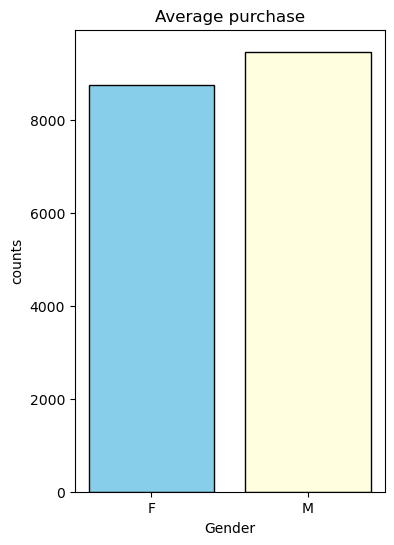

In [33]:
# now we visualize these by bar graph


gender_purchase =df.groupby('Gender')['Purchase'].mean()

plt.figure(figsize=(4,6))
plt.bar(gender_purchase.index,gender_purchase.values,color =['skyblue','lightyellow'],edgecolor ='black')
plt.title('Average purchase')
plt.xlabel('Gender')
plt.ylabel('counts')
plt.tight_layout
plt.show()

# Now we calculate how many purchases according to their age

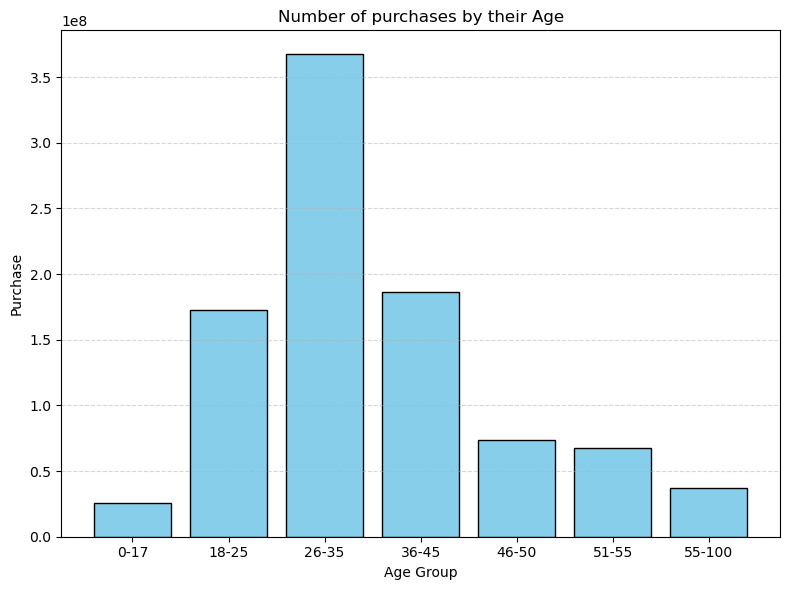

In [34]:
categories =['Age']
values =['Purchase']


age_purchase = df.groupby('Age')['Purchase'].sum().sort_index()

plt.figure (figsize =(8,6))
plt.bar(age_purchase.index, age_purchase.values, color='skyblue', edgecolor='black')
plt.title('Number of purchases by their Age')
plt.xlabel('Age Group')
plt.ylabel('Purchase')
plt.grid(axis ='y', linestyle ='--', alpha =0.5)
plt.tight_layout()
plt.show()


# We find the that which one purchase more Married or Unmarried?

In [35]:
df['Marital_Status'].value_counts()

Marital_Status
Unmarried    59118
Married      40881
Name: count, dtype: int64

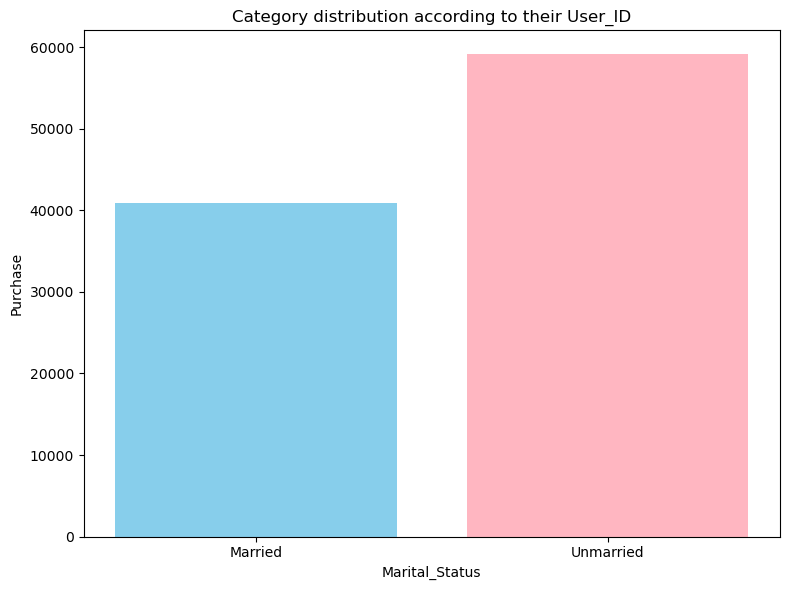

In [36]:
Marital_counts = df['Marital_Status'].value_counts().sort_index()

plt.figure(figsize =(8,6))
plt.bar(Marital_counts.index.astype(str), Marital_counts.values ,color =['skyblue','lightpink'])
plt.title('Category distribution according to their User_ID')
plt.xlabel('Marital_Status')
plt.ylabel('Purchase')
plt.tight_layout()
plt.show()

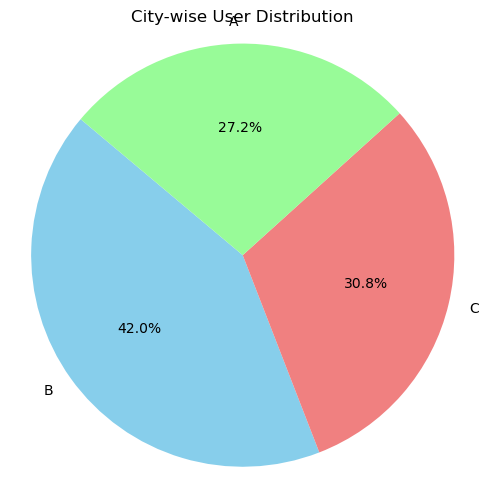

In [37]:
city_distribution = df['City_Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(
    city_distribution.values,
    labels=city_distribution.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral', 'palegreen'],
    startangle=140
)
plt.title('City-wise User Distribution')
plt.axis('equal')  # Ensures the pie is a circle
plt.tight_layout()
plt.show()

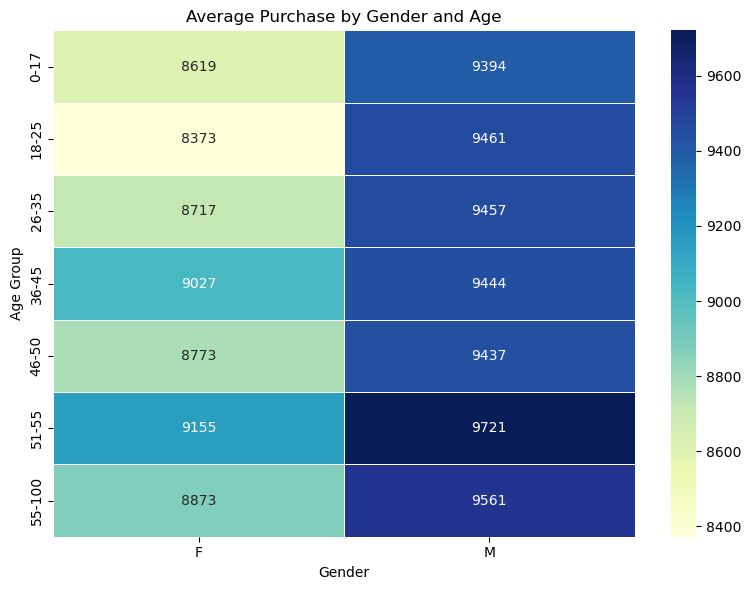

In [38]:
pivot = df.pivot_table(values='Purchase', index='Age', columns='Gender', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)
plt.title('Average Purchase by Gender and Age')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
lb =LabelEncoder()

In [41]:
df['Gender'] =lb.fit_transform(df['Gender'])
df['City_Category'] =lb.fit_transform(df['City_Category'])
df['Product_ID'] =lb.fit_transform(df['Product_ID'])
df['Age'] =lb.fit_transform(df['Age'])
df['Marital_Status'] =lb.fit_transform(df['Marital_Status'])




# Now we divide our data for traning and testing

In [42]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,616,0,0,10,0,2,1,3,8370
1,1000001,2177,0,0,10,0,2,1,1,15200
2,1000001,767,0,0,10,0,2,1,12,1422
3,1000001,743,0,0,10,0,2,1,12,1057
4,1000002,2515,1,6,16,2,4,1,8,7969


In [43]:
x =df.drop(columns =['Purchase'])
y =df['Purchase']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size = 0.2,random_state =42)

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf =RandomForestRegressor()

In [48]:
rf.fit(x_train ,y_train)

RandomForestRegressor()

In [49]:
y_pred =rf.predict(x_test)

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test ,y_pred)

0.6789068969126576

# Here we apply fine tuning so we get our accuarcy so much better then this

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score , mean_squared_error

In [62]:
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None] + list(np.arange(5, 51, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['sqrt', 'log2']

}
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,                  # Number of random trials
    scoring='neg_mean_squared_error',
    cv =10,
    random_state=42,
    n_jobs=-1,
    verbose=2 

    )

In [63]:
random_search.fit(x_train ,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 45, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [64]:
print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 30}


In [65]:
best_rf = random_search.best_estimator_

In [66]:
y_pred = best_rf.predict(x_test)

In [67]:
# Compute performance metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R²: {r2_test:.3f}")

Test RMSE: 2895.05
Test R²: 0.664
